In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data=data.drop("id",axis=1)

In [7]:
data=data.drop("Unnamed: 32",axis=1)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
m=data[data.diagnosis=="M"]

In [10]:
m

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [11]:
b=data[data.diagnosis=="B"]

In [12]:
b

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


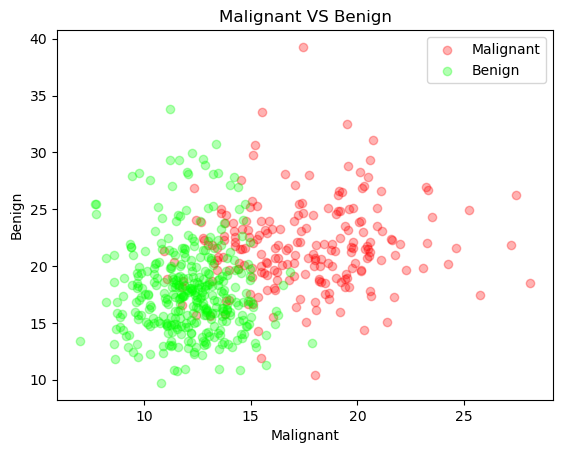

In [13]:
plt.title("Malignant VS Benign")
plt.xlabel("Malignant")
plt.ylabel("Benign")
plt.scatter(m.radius_mean,m.texture_mean,color="Red",label="Malignant",alpha=0.3)
plt.scatter(b.radius_mean,b.texture_mean,color="lime",label="Benign",alpha=0.3)
plt.legend()

In [14]:
data.diagnosis=[1 if i=="M" else 0 for i in data.diagnosis]

In [38]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.741254,0.407111,0.754245,0.745664,0.304018,0.602065,0.752845,0.790748,0.293594,...,0.795813,0.443358,0.801401,0.785407,0.387885,0.583941,0.688232,0.779945,0.383165,0.316421
radius_mean,0.741254,1.000000,0.303868,0.998347,0.992124,0.105271,0.529787,0.725085,0.816742,0.127734,...,0.972976,0.281921,0.967128,0.953473,0.084623,0.458968,0.603564,0.752516,0.176453,0.043659
texture_mean,0.407111,0.303868,1.000000,0.309929,0.309598,-0.022729,0.239106,0.319993,0.281939,0.071375,...,0.332738,0.908867,0.341368,0.331967,0.079620,0.259470,0.303768,0.277020,0.098382,0.111614
perimeter_mean,0.754245,0.998347,0.309929,1.000000,0.990969,0.138133,0.573963,0.757549,0.841477,0.153934,...,0.974861,0.288575,0.973101,0.955845,0.113952,0.497411,0.635056,0.776930,0.196081,0.082954
area_mean,0.745664,0.992124,0.309598,0.990969,1.000000,0.107853,0.522228,0.732061,0.821292,0.134208,...,0.972647,0.283500,0.966550,0.968340,0.094481,0.443513,0.597134,0.742652,0.170612,0.045649
smoothness_mean,0.304018,0.105271,-0.022729,0.138133,0.107853,1.000000,0.632260,0.464609,0.508513,0.516732,...,0.161530,0.027220,0.178895,0.162405,0.793997,0.403701,0.366044,0.446014,0.331749,0.458146
compactness_mean,0.602065,0.529787,0.239106,0.573963,0.522228,0.632260,1.000000,0.867824,0.825167,0.513492,...,0.572608,0.243389,0.617707,0.557655,0.554556,0.868952,0.809259,0.811269,0.448738,0.666189
concavity_mean,0.752845,0.725085,0.319993,0.757549,0.732061,0.464609,0.867824,1.000000,0.938791,0.402377,...,0.754977,0.324770,0.785025,0.751669,0.442173,0.766314,0.897846,0.876544,0.360952,0.484811
concave points_mean,0.790748,0.816742,0.281939,0.841477,0.821292,0.508513,0.825167,0.938791,1.000000,0.399854,...,0.838559,0.285380,0.856292,0.831541,0.436275,0.673878,0.781777,0.910072,0.342620,0.362809
symmetry_mean,0.293594,0.127734,0.071375,0.153934,0.134208,0.516732,0.513492,0.402377,0.399854,1.000000,...,0.167598,0.079910,0.186893,0.168757,0.389893,0.380871,0.325854,0.345336,0.660621,0.342942


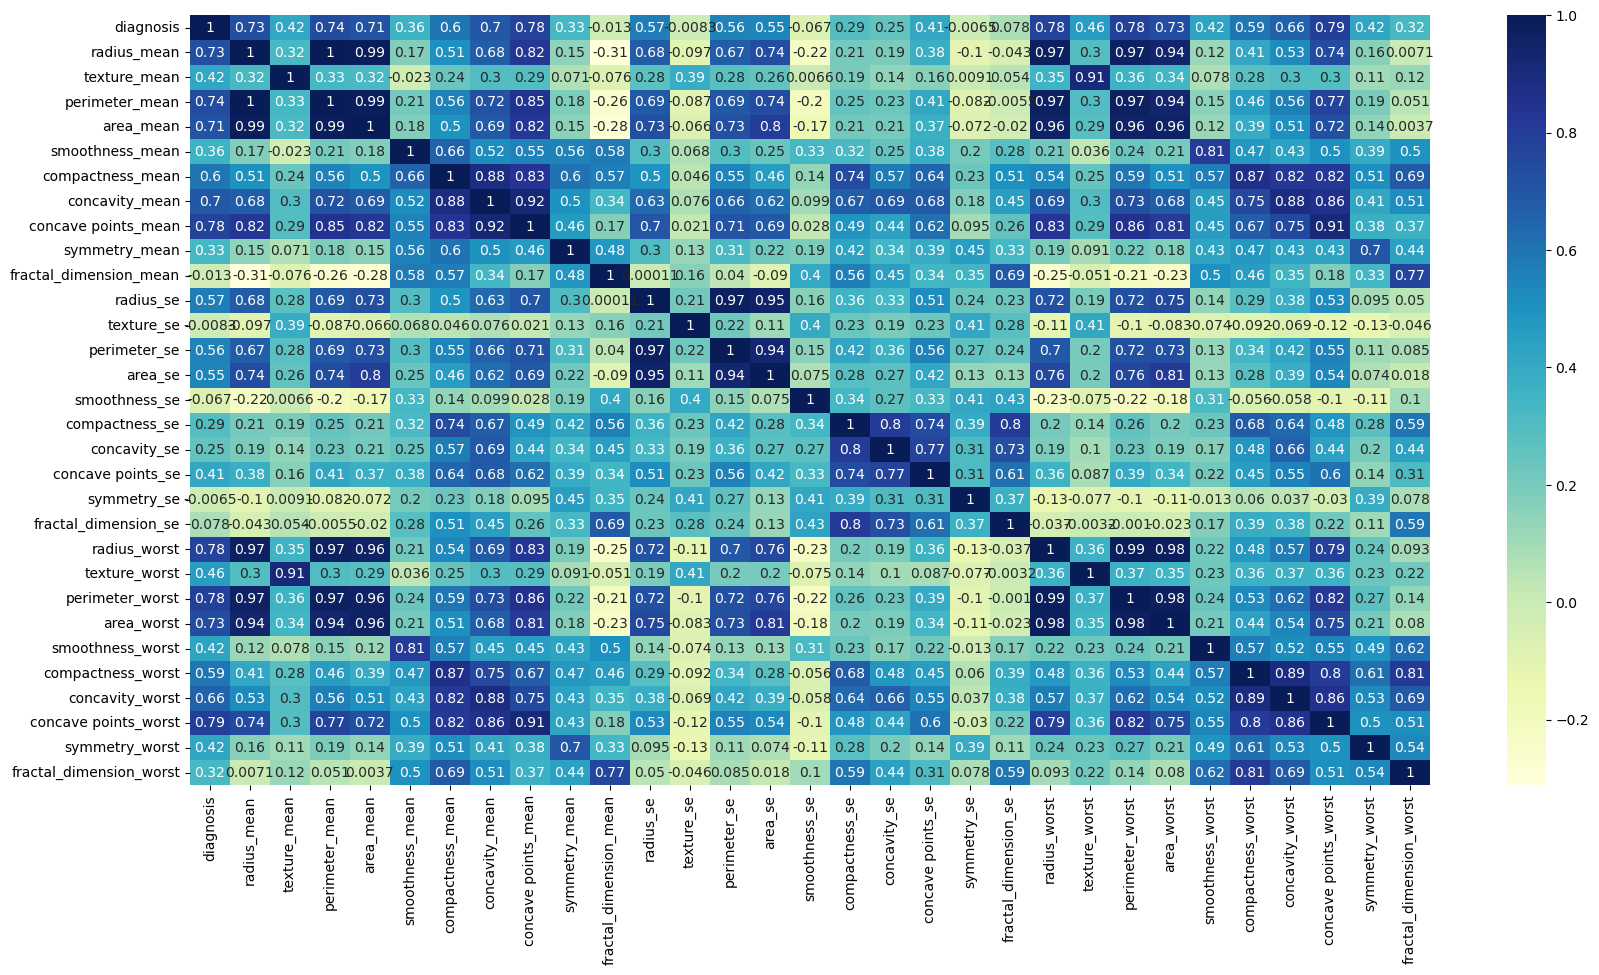

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(data))#Absolute z value
z

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,0.353632,1.685955,1.908708,0.826962,0.487072,0.023846,0.548144,0.001392,...,1.805927,0.369203,1.535126,1.890489,0.375612,0.430444,0.146749,1.087084,0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,0.768909,0.253732,0.592687,0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.281464,0.133984,0.249939,0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,0.009560,...,1.298575,1.466770,1.338539,1.220724,0.220556,0.313395,0.613179,0.729259,0.868353,0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,0.273318,0.664512,1.629151,1.360158,0.709091
565,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,0.017833,0.693043,1.263669,0.217664,...,1.536720,2.047399,1.421940,1.494959,0.691230,0.394820,0.236573,0.733827,0.531855,0.973978
566,1.297676,0.702284,2.045574,0.672676,0.577953,0.840484,0.038680,0.046588,0.105777,0.809117,...,0.561361,1.374854,0.579001,0.427906,0.809587,0.350735,0.326767,0.414069,1.104549,0.318409
567,1.297676,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [18]:
data = data[(z<3).all(axis=1)]
data.shape

(495, 31)

In [19]:
x = data.drop(["diagnosis"], axis = 1)
y=data.diagnosis.values

In [20]:
#NORMALISATION
x = (x - np.min(x)) / (np.max(x) - np.min(x))

C:\Users\ashut\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ashut\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [21]:
data.skew()

diagnosis                  0.728690
radius_mean                0.712362
texture_mean               0.431119
perimeter_mean             0.732779
area_mean                  1.143507
smoothness_mean            0.232561
compactness_mean           0.764375
concavity_mean             1.148972
concave points_mean        1.026911
symmetry_mean              0.329311
fractal_dimension_mean     0.596993
radius_se                  1.580303
texture_se                 0.747512
perimeter_se               1.656852
area_se                    1.930293
smoothness_se              1.151489
compactness_se             1.168899
concavity_se               1.081837
concave points_se          0.609499
symmetry_se                1.129105
fractal_dimension_se       1.375670
radius_worst               0.912895
texture_worst              0.267705
perimeter_worst            0.912860
area_worst                 1.350034
smoothness_worst           0.227603
compactness_worst          0.992620
concavity_worst            0

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [23]:
lr = LogisticRegression()
et=ExtraTreesClassifier(n_estimators=140,criterion='entropy',random_state=40)
rf = RandomForestClassifier(n_estimators=120,random_state=40)

In [24]:
model = [lr,et,rf]

In [25]:
def fit_model(x_train,y_train,x_test,y_test):
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        print("{} model--->\n".format(i))
        print("Accuracy Score :\n",accuracy_score(y_test,pred))
        print("Confusion Matrix: \n",confusion_matrix(y_test,pred))
        print("Classification report",classification_report(y_test,pred))
        print("-"*50)

In [26]:
fit_model(x_train,y_train,x_test,y_test)

LogisticRegression() model--->

Accuracy Score :
 0.9798657718120806
Confusion Matrix: 
 [[93  0]
 [ 3 53]]
Classification report               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.95      0.97        56

    accuracy                           0.98       149
   macro avg       0.98      0.97      0.98       149
weighted avg       0.98      0.98      0.98       149

--------------------------------------------------
ExtraTreesClassifier(criterion='entropy', n_estimators=140, random_state=40) model--->

Accuracy Score :
 0.9731543624161074
Confusion Matrix: 
 [[91  2]
 [ 2 54]]
Classification report               precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.96      0.96      0.96        56

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97 

In [27]:
model = lr.fit(x_train,y_train)

In [28]:
import pickle
pickle.dump(model,open('cancer_lr.pkl','wb'))

In [68]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [67]:
model.predict(np.array([0.175947,0.284150,0.177361,0.097050,0.434509,0.310066,0.073409,0.154673,0.160233,0.635906,0.12,0.37,0.15,0.055,0.453,0.25,0.095,0.238,0.279,0.249,0.163376,0.370733,0.164341,0.086257,0.553124,0.301565,0.099352,0.241688,0.293915,0.468631]).reshape(1,-1))

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [50]:
a=[0.175947,0.284150,0.177361,0.097050,0.434509,0.310066,0.073409,0.154673,0.160233,0.635906,0.163376,0.370733,0.164341,0.086257,0.553124,0.301565,0.099352,0.241688,0.293915,0.468631]

In [51]:
b= np.array(a)
b

array([0.175947, 0.28415 , 0.177361, 0.09705 , 0.434509, 0.310066,
       0.073409, 0.154673, 0.160233, 0.635906, 0.163376, 0.370733,
       0.164341, 0.086257, 0.553124, 0.301565, 0.099352, 0.241688,
       0.293915, 0.468631])

In [56]:
b.reshape(1,-1)

array([[0.175947, 0.28415 , 0.177361, 0.09705 , 0.434509, 0.310066,
        0.073409, 0.154673, 0.160233, 0.635906, 0.163376, 0.370733,
        0.164341, 0.086257, 0.553124, 0.301565, 0.099352, 0.241688,
        0.293915, 0.468631]])